In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/processed/moods_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   full_date             300 non-null    object 
 1   weekday               300 non-null    int64  
 2   time                  300 non-null    float64
 3   mood                  300 non-null    object 
 4   activities            300 non-null    object 
 5   month                 300 non-null    int64  
 6   mood_numeric          300 non-null    int64  
 7   activities_count      300 non-null    int64  
 8   sleep_level           300 non-null    float64
 9   emotions_encoded      300 non-null    float64
 10  health_encoded        198 non-null    float64
 11  productivity_encoded  190 non-null    float64
 12  places_encoded        63 non-null     float64
 13  tasks_encoded         116 non-null    float64
 14  school_encoded        124 non-null    float64
 15  positive_emotions     3

In [4]:
df = df.drop(
    ['full_date', 'mood', 'activities', 'health_encoded', 'productivity_encoded', 'places_encoded', 
     'tasks_encoded', 'school_encoded'], axis=1
)

In [5]:
scaler = StandardScaler()

## Clustering referente a mood

In [6]:
columns = [
    'weekday', 'time', 'month', 'activities_count', 'sleep_level', 'emotions_encoded', 
    #'health_encoded', 'productivity_encoded', 'places_encoded', 'tasks_encoded', 'school_encoded', 
    'positive_emotions', 'neutral_emotions', 'negative_emotions'
]

In [7]:
df[columns] = scaler.fit_transform(df[columns])

In [8]:
X = df.drop('mood_numeric', axis=1).values

C:\Users\isaij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\isaij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\isaij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\isaij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

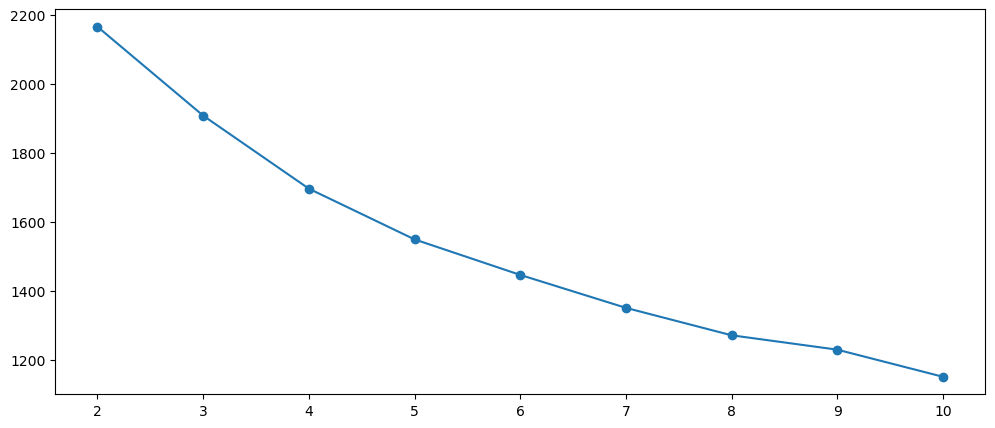

In [9]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12, 5))

plt.plot(k_values, inertia, marker='o')

plt.show()

In [10]:
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

C:\Users\isaij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

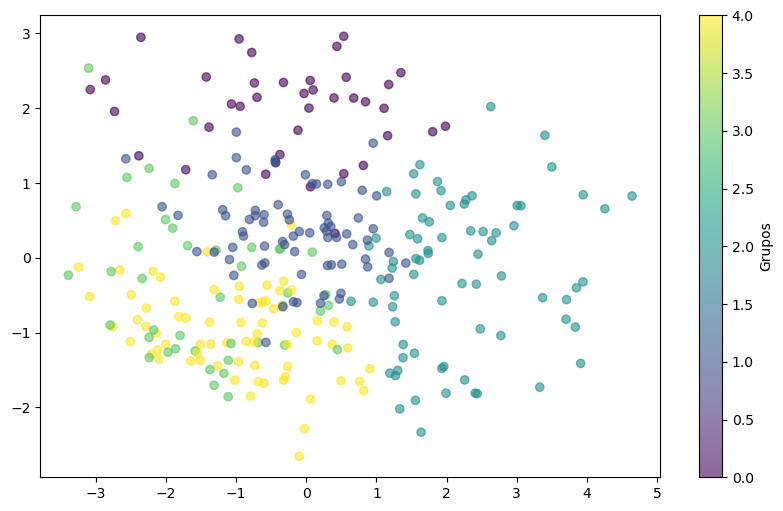

In [12]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.colorbar(scatter, label="Grupos")
plt.show()

In [13]:
df['cluster'] = clusters

In [14]:
df.head()

weekday      time     month  mood_numeric  activities_count  sleep_level  \
0 -0.985560  0.538987  1.504026             4          0.864279      0.91183   
1 -1.482481  0.594593  1.504026             4          0.536900      0.91183   
2  1.499045  0.578706  1.504026             4          0.536900      0.91183   
3  1.002124  0.512508  1.504026             4         -0.445234      0.91183   
4  0.505203  0.695214  1.504026             4         -0.117856      0.91183   

   emotions_encoded  positive_emotions  neutral_emotions  negative_emotions  \
0          0.327056           2.625032          1.962135           0.312238   
1          1.149407           1.897877         -0.450326          -1.035552   
2          1.149407           1.897877         -0.450326          -1.035552   
3          1.047103           1.170721         -0.450326          -1.035552   
4          1.047103           1.170721         -0.450326          -1.035552   

   cluster  
0        3  
1        4  
2        4  
3        4  
4        4

In [15]:
mood_group = df.groupby('cluster')['mood_numeric'].value_counts(normalize=True) * 100
print("Porcentaje de mood por grupo:")
print(mood_group)

Porcentaje de mood por grupo:
cluster  mood_numeric
0        4               92.307692
         3                5.128205
         2                2.564103
1        4               94.520548
         3                4.109589
         5                1.369863
2        3               50.684932
         4               32.876712
         2               13.698630
         1                2.739726
3        4               88.372093
         3                6.976744
         2                2.325581
         5                2.325581
4        4               83.333333
         3               11.111111
         5                5.555556
Name: proportion, dtype: float64


## Clustering referente a d√≠a de la semana